In [1]:
import sys
sys.path.append('../')

In [2]:
import pennylane as qml 
from pennylane import numpy as np 
import matplotlib.pyplot as plt 
from main import VarFourier
from main import RY_ansatz, Rot_ansatz, ZGR_ansatz

In [3]:
num_qubits = 6

In [4]:
def init_state():
    #qml.AmplitudeEmbedding(features=vecs[:,0], wires=range(num_qubits))
    pass 

In [5]:
num_layers = 8
#var_state_class = ZGR_ansatz(num_qubits, num_layers)
var_state_class = Rot_ansatz(num_qubits,num_layers)
var_state_class = RY_ansatz(num_qubits,num_layers)
var_state = var_state_class.construct_circuit
num_params = var_state_class.num_params


(<Figure size 5300x700 with 1 Axes>, <Axes: >)

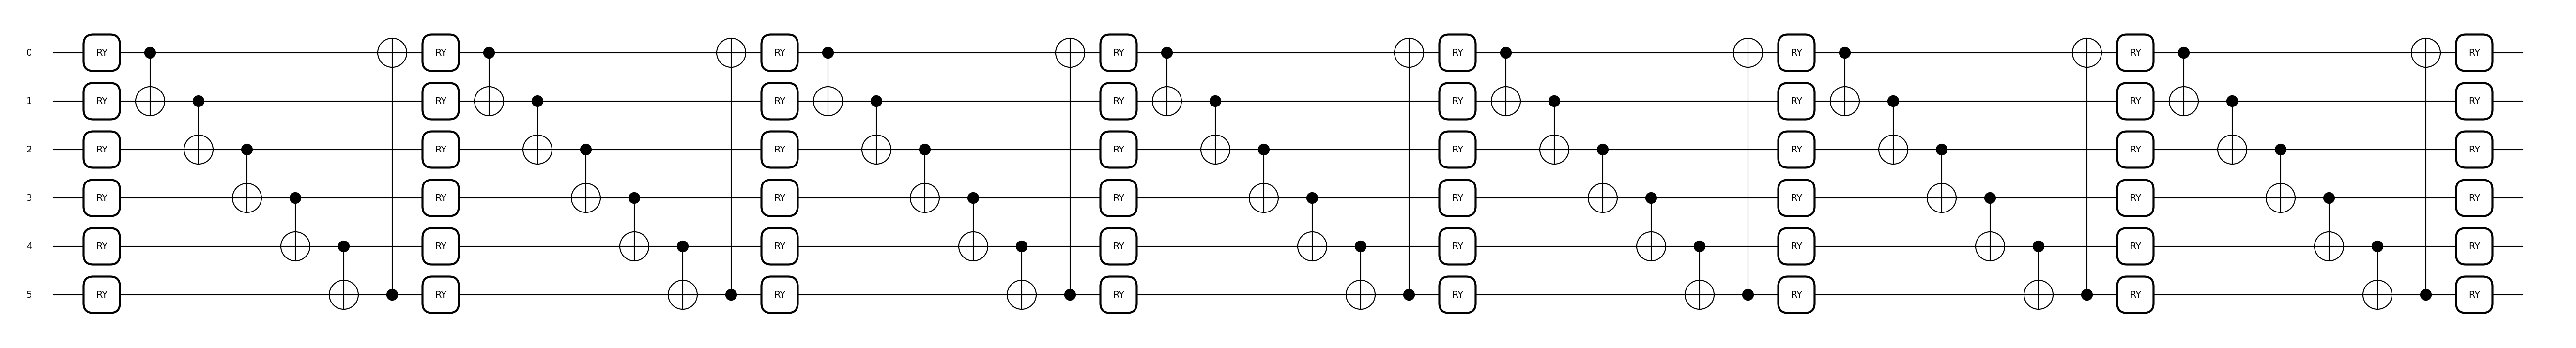

In [6]:
qml.draw_mpl( var_state )( num_params*[0] )

In [7]:
device = qml.device( "lightning.qubit", 
                    wires=num_qubits)

varqft = VarFourier( num_qubits,
                    lambda x : x**2/2,
                    lambda p : p**2/2,
                    device,
                    var_state  = var_state,
                    init_state = init_state,
                    #semi_classical=True
                    )

In [8]:
vals, vecs = varqft.energy_eigens()
val = vals[0]
vec = vecs[:,0]
val2 = vals[1]
vec2 = vecs[:,1] 
vals

array([  0.5       ,   1.5       ,   2.49999996,   3.50000062,
         4.49999279,   5.50005422,   6.49960958,   7.50176601,
         8.49104199,   9.52460606,  10.40897187,  11.65966708,
        12.19033234,  14.06633699,  14.27534256,  16.85007412,
        16.93707916,  20.03636287,  20.08118725,  23.62300147,
        23.64987422,  27.60475159,  27.62234873,  31.97770068,
        31.98977126,  36.73925908,  36.7476677 ,  41.88772206,
        41.89348811,  47.42194562,  47.42565755,  53.34114427,
        53.343145  ,  59.64476764,  59.64524396,  66.33145075,
        66.33242445,  73.40139218,  73.40383525,  80.85477928,
        80.85880311,  88.69137521,  88.6971966 ,  96.91096945,
        96.91894254, 105.51335235, 105.52402866, 114.49828231,
       114.51252013, 123.8654316 , 123.88460138, 133.61427884,
       133.64067271, 143.74386078, 143.78158468, 154.25210418,
       154.30927681, 165.13363443, 165.22886929, 176.37045492,
       176.557429  , 187.97084335, 188.2859242 , 201.39

In [9]:
params_init = np.random.randn( num_params )*0.01

params_ground, energies_ground = varqft.run( params_init, max_iterations=500, learning_rate=0.1 )

Step = 0,  Energy = 69.94652557
Step = 5,  Energy = 32.94358444
Step = 10,  Energy = 21.94950867
Step = 15,  Energy = 18.87754440
Step = 20,  Energy = 15.26103973
Step = 25,  Energy = 13.42375374
Step = 30,  Energy = 11.96639729
Step = 35,  Energy = 10.19949913
Step = 40,  Energy = 8.53631401
Step = 45,  Energy = 7.64712143
Step = 50,  Energy = 7.13818359
Step = 55,  Energy = 6.32630062
Step = 60,  Energy = 5.46495247
Step = 65,  Energy = 4.44972467
Step = 70,  Energy = 3.45922303
Step = 75,  Energy = 2.92850971
Step = 80,  Energy = 2.65569472
Step = 85,  Energy = 2.38409424
Step = 90,  Energy = 2.29099798
Step = 95,  Energy = 2.22232008
Step = 100,  Energy = 2.15102530
Step = 105,  Energy = 2.10918331
Step = 110,  Energy = 2.05911350
Step = 115,  Energy = 2.00579119
Step = 120,  Energy = 1.94510043
Step = 125,  Energy = 1.87995720
Step = 130,  Energy = 1.81417120
Step = 135,  Energy = 1.73558569
Step = 140,  Energy = 1.63334203
Step = 145,  Energy = 1.50258791
Step = 150,  Energy = 1.

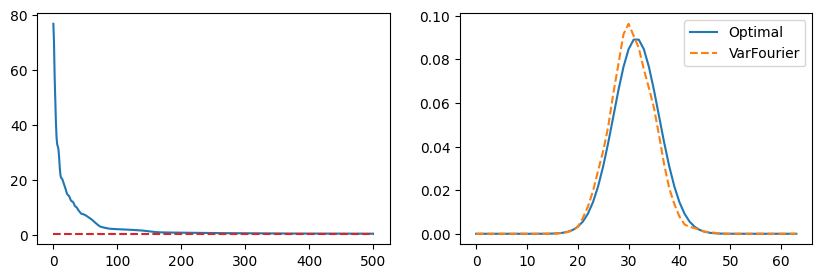

In [10]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_ground )
ax[0].hlines( val, 0, len(energies_ground), colors='tab:red', linestyles='--' ) 

ground_state = varqft.state( params_ground[-1] )

ax[1].plot( np.abs(vec)**2) 
ax[1].plot( np.abs(ground_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [11]:
abs(np.vdot( ground_state, vec ))**2

0.989534427757273

In [12]:
params_ground[-1]

Array([-6.5834230e-01,  1.6118930e-01,  2.2719179e-03,  8.0447876e-01,
        2.6010888e-02,  5.6356347e-01,  4.2618036e-01,  7.2803413e-03,
       -1.9754025e-03,  1.8421574e-02, -1.5410088e+00,  1.6633922e+00,
       -1.3269306e+00,  8.4215730e-02, -1.2056553e-01, -1.5782610e+00,
       -4.6140671e-02,  7.5136848e-02, -4.6929991e-01,  1.5850596e+00,
       -1.5902405e+00,  1.1087952e-01,  1.2302429e-01, -1.1112366e+00,
        1.5681195e+00, -9.5107798e-03,  1.2944180e-01, -3.0373927e-02,
       -1.5860666e+00, -3.8562056e-02,  1.8286226e-02, -1.6595627e-01,
       -7.7281898e-01, -5.7903486e-01,  1.9886522e-01, -5.1979665e-03,
       -5.4764503e-01,  5.2969873e-01, -8.2509029e-01,  7.1276561e-03,
       -2.0093590e-02,  5.9526130e-03,  2.2834917e-03, -1.5632377e+00,
        1.9345779e+00,  2.9186745e+00,  1.7305353e-01,  1.2123929e+00],      dtype=float32)

In [13]:
varqft = VarFourier( num_qubits, 
                    lambda x : x**2/2, 
                    lambda p : p**2/2, 
                    device, 
                    var_state  = var_state, 
                    init_state = init_state, 
                    orthovals  = 25, 
                    orthoparams= np.copy(params_ground[-1]) 
                    ) 

In [16]:
params_init = np.random.randn( num_params )*0.01

params_excited, energies_excited = varqft.run( params_init , 
                                                max_iterations=500, 
                                                learning_rate= 0.2)

Step = 0,  Energy = 80.14894867
Step = 5,  Energy = 30.14359283
Step = 10,  Energy = 22.99179840
Step = 15,  Energy = 16.32493210
Step = 20,  Energy = 11.89128876
Step = 25,  Energy = 9.36043358
Step = 30,  Energy = 8.48772621
Step = 35,  Energy = 7.42346430
Step = 40,  Energy = 6.68144417
Step = 45,  Energy = 6.65967989
Step = 50,  Energy = 6.30988598
Step = 55,  Energy = 5.31507397
Step = 60,  Energy = 4.55899096
Step = 65,  Energy = 4.04361725
Step = 70,  Energy = 3.63627005
Step = 75,  Energy = 3.37367487
Step = 80,  Energy = 3.27981663
Step = 85,  Energy = 3.24187660
Step = 90,  Energy = 3.23302197


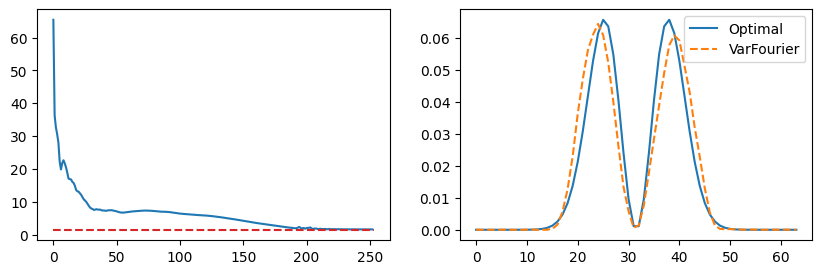

In [ ]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_excited )
ax[0].hlines( val2, 0, len(energies_excited), colors='tab:red', linestyles='--' ) 

excited_state = varqft.state( params_excited[-1] )

ax[1].plot( np.abs(vec2)**2) 
ax[1].plot( np.abs(excited_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [ ]:
abs(np.vdot( ground_state, vec ))**2

0.9984161049117029

In [ ]:
abs(np.vdot( ground_state, excited_state ))**2 

4.3386398394101855e-06

In [ ]:
abs(np.vdot( excited_state, vec2 ))**2

0.976457035249967